In [3]:
!pip install miningpy

In [40]:
import miningpy as mining
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [91]:
DATA_FOLDER = 'data/'
bm = pd.read_csv(f'{DATA_FOLDER}BS_block_model.csv')

In [92]:
bm.rename(columns = {
    'X': 'x', 
    'Y': 'y',
    'Z': 'z'
}, inplace = True)

In [93]:
idx = bm['x'].idxmin()
x_datum = bm['x'][idx]
y_datum = bm['y'][idx]
z_datum = bm['z'][idx]

x_dim, y_dim, z_dim = 10, 10, 10
z_rot = -26.4626

# bm_ijk = bm.ijk(
#     indexing=0,
#     xyz_cols=('x', 'y', 'z'),
#     origin=(x_datum, y_datum, z_datum),
#     dims=(x_dim, y_dim, z_dim),
#     inplace=False,
#     rotation=(0, 0, z_rot)
# )

In [80]:
bm_flat = {}
for idx, row in bm.iterrows():
    x, y, z = row.x, row.y, row.z
    if (x, y) in bm_flat:
        bm_flat[(x, y)] = min(bm_flat[(x, y)], z)
    else:
        bm_flat[(x, y)] = z

/var/folders/4h/m6_qv78d1ll6g0_5dn81rvh80000gp/T/ipykernel_58166/105532472.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


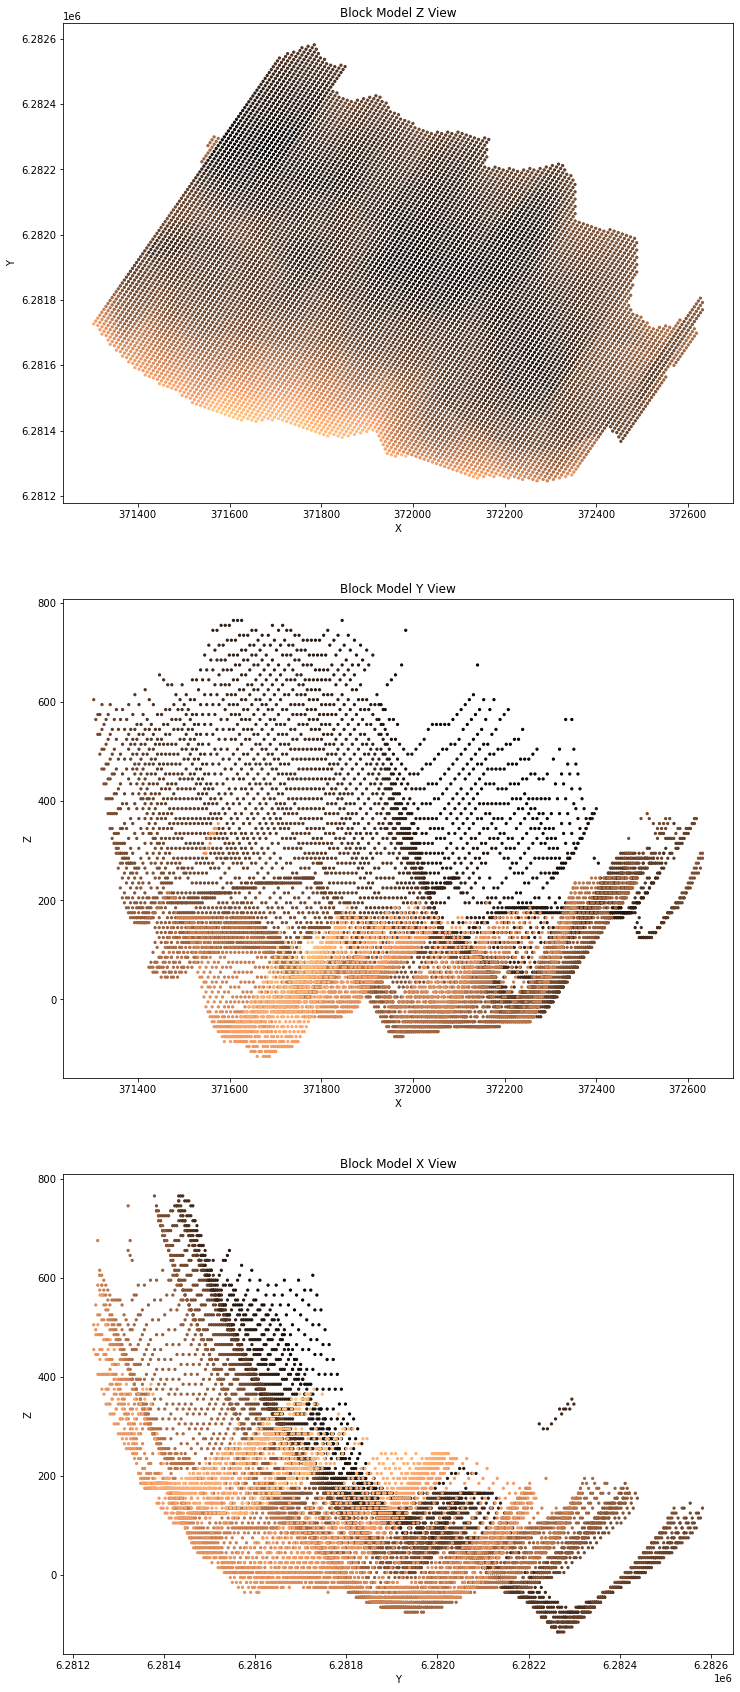

In [81]:
x, y = zip(*bm_flat.keys())
z = list(bm_flat.values())

fig, axs = plt.subplots(3, figsize=(12, 30))
s = 5

ax = axs[0]
ax.scatter(x, y, c=z, cmap='copper', s=s)
ax.set_title("Block Model Z View")
ax.set_xlabel("X")
ax.set_ylabel("Y")

ax = axs[1]
ax.scatter(x, z, c=y, cmap='copper', s=s)
ax.set_title("Block Model Y View")
ax.set_xlabel("X")
ax.set_ylabel("Z")

ax = axs[2]
ax.scatter(y, z, c=x, cmap='copper', s=s)
ax.set_title("Block Model X View")
ax.set_xlabel("Y")
ax.set_ylabel("Z")

fig.show()

In [97]:
mining.visualisation.plot3D(
    bm,
    # xyz_cols=('x', 'y', 'z'),
    col='CU',
    dims=(x_dim, y_dim, z_dim)
)

ValueError: data length of (404919) != required length (0)

,x,y,z
0,371581.563,6281499.155,875.0
1,371590.517,6281494.703,875.0
2,371599.471,6281490.251,875.0
3,371608.426,6281485.799,875.0
4,371617.380,6281481.348,875.0
...,...,...,...
404914,371678.190,6282277.527,-115.0
404915,371687.144,6282273.075,-115.0
404916,371673.738,6282268.573,-115.0
404917,371682.692,6282264.121,-115.0
